In [1]:
from frame_iterator import FramesIterator
import glob
import cv2
import os
import torch
from tqdm import tqdm
from IPython.display import Image, Video, display

In [2]:
model_path = 'best_yolov5s.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True, device='mps')
model.conf = 0.5

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/antonlukanov/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-10 Python-3.9.12 torch-1.13.0 MPS

Fusing layers... 
Model summary: 213 layers, 7031701 parameters, 0 gradients
Adding AutoShape... 


In [190]:
# videos_path = glob.glob('episodes_for_detector/*')
# videos_path = glob.glob('/Users/antonlukanov/Desktop/Sber/yolo_detector/episodes_114/*')
# videos_path = glob.glob('/Users/antonlukanov/Desktop/Sber/yolo_detector/episodes_old/114/*')
# videos_path = glob.glob('/Users/antonlukanov/Desktop/Sber/yolo_detector/episodes_old/old/*')
# videos_path = glob.glob('/Users/antonlukanov/Desktop/Sber/yolo_detector/episode_stranger/*')
videos_path = glob.glob('/Users/antonlukanov/Desktop/Sber/tiredness/drivers_video/*')
videos_path

['/Users/antonlukanov/Desktop/Sber/tiredness/drivers_video/sleeping.mp4',
 '/Users/antonlukanov/Desktop/Sber/tiredness/drivers_video/Driver sleeps for a full minute while driving.mp4',
 '/Users/antonlukanov/Desktop/Sber/tiredness/drivers_video/videoplayback.mp4',
 '/Users/antonlukanov/Desktop/Sber/tiredness/drivers_video/Водитель засыпает за рулем.mp4']

## Заменять filepath_to_write и blur_rectangle

In [182]:
# filepath_to_write, video_name = 'output/images_outside_car_from_back', '/3_side_cam_directed_from_back_to_forward.mp4'
filepath_to_write, video_name = 'output/images_inside_car', '/2_inside_cam.mp4'
# filepath_to_write, video_name = 'output/images_outside_car_from_forward', '/4_side_cam_directed_from_front_to_back.mp4'

In [194]:
# !mkdir output/images_from_tiredness_video
filepath_to_write = 'output/images_from_tiredness_video'

In [199]:
for video_path in tqdm(videos_path):
    # video_path += video_name
    fr_iterator = FramesIterator(video_path, span_sec=1)
    for frame, curr_frame, frame_time in fr_iterator:
        try:
            # blur_rectangle(frame, (370, 20),(1030, 60)) # середина на квадратных видосах 
            # blur_rectangle(frame, (1200, 20),(1280, 60)) # скорость правый верх на квадратных видосах 
            # blur_rectangle(frame, (1180, 25),(1280, 60)) # скорость правый верх 
            # blur_rectangle(frame, (420, 25),(750, 60)) # время верх середина
            # blur_rectangle(frame, (30, 650),(450, 700)) # координаты слева снизу, только для новых видео episodes_for_detector
            results = model(frame)
            if len(results.xyxy[0]):
                # episode_name = os.path.basename(os.path.dirname(video_path))
                episode_name = os.path.basename(video_path)[:-4]
                save_dir = os.path.join(filepath_to_write, episode_name)
                if not os.path.exists(save_dir):
                    os.mkdir(save_dir)   
                cv2.imwrite(os.path.join(save_dir,'frame_num_' + str(curr_frame) + '.png'), frame)
        except:
            continue

100%|█████████████████████████████████████████████| 4/4 [00:25<00:00,  6.39s/it]


# Blur image

In [163]:
image_path = glob.glob('/Users/antonlukanov/Desktop/Sber/yolo_detector/test_blur/*')
image_path

['/Users/antonlukanov/Desktop/Sber/yolo_detector/test_blur/frame_num_3200.png',
 '/Users/antonlukanov/Desktop/Sber/yolo_detector/test_blur/frame_num_131.png',
 '/Users/antonlukanov/Desktop/Sber/yolo_detector/test_blur/frame_num_31.png',
 '/Users/antonlukanov/Desktop/Sber/yolo_detector/test_blur/frame_num_161.png']

In [164]:
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = Image(data=ret)
    display(i)

In [165]:
def blur_rectangle(image, topLeft, bottomRight):
    x, y = topLeft[0], topLeft[1]
    w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]

    # Grab ROI with Numpy slicing and blur
    ROI = image[y:y+h, x:x+w]
    blur = cv2.GaussianBlur(ROI, (51,51), 0) 

    # Insert ROI back into image
    image[y:y+h, x:x+w] = blur
    return image

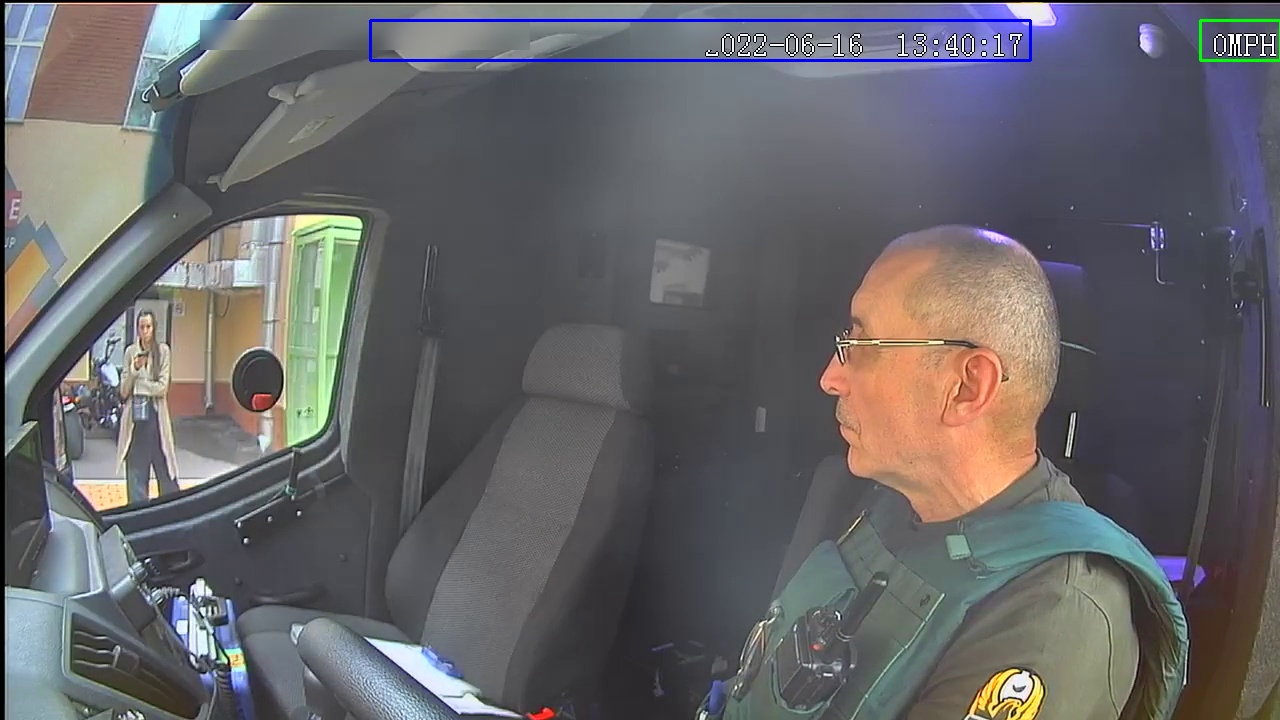

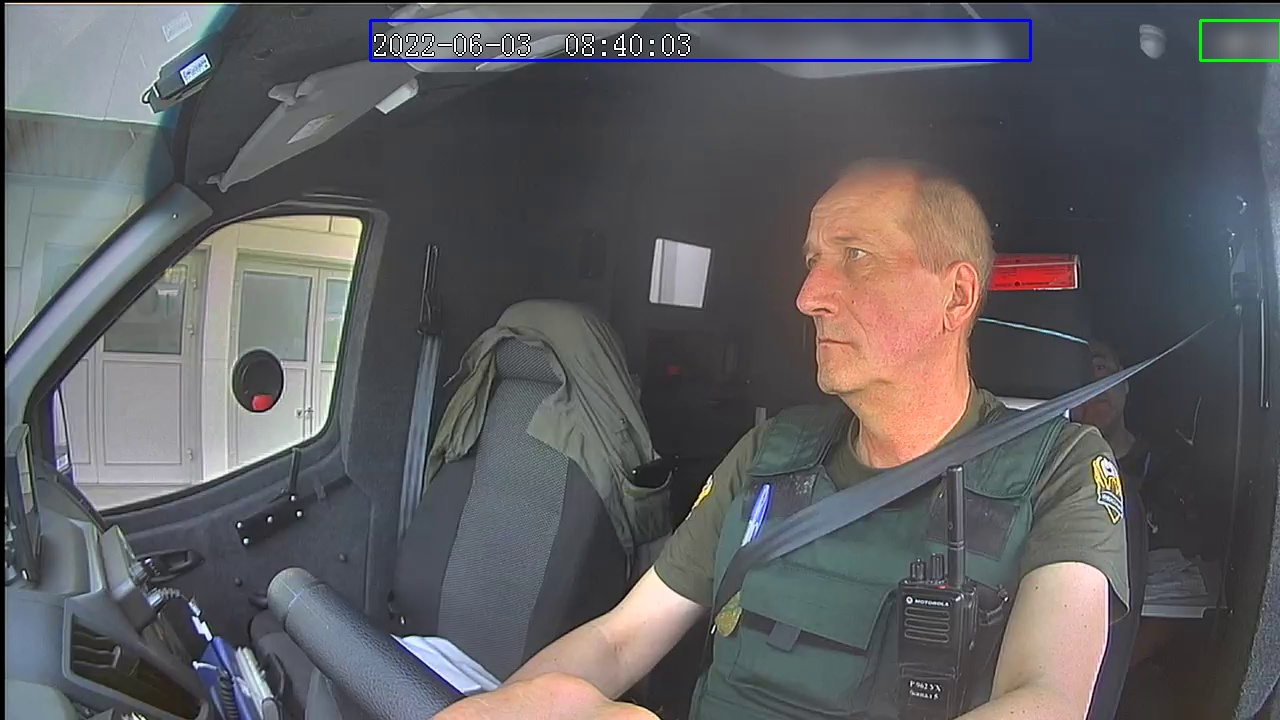

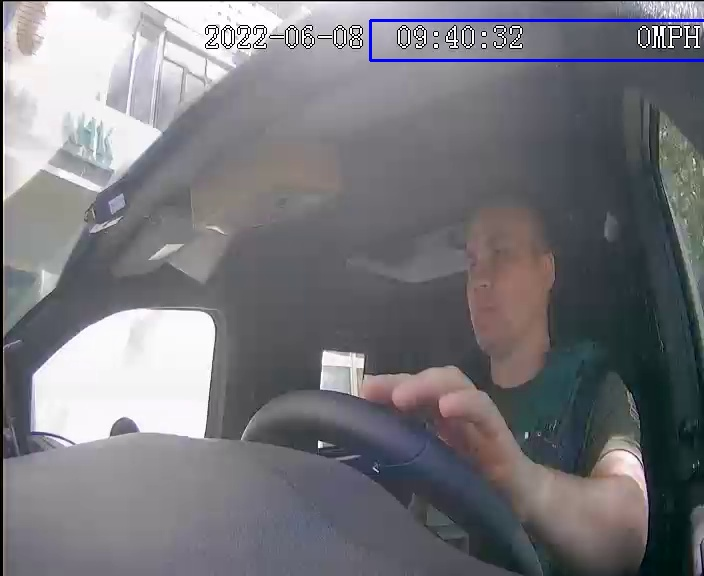

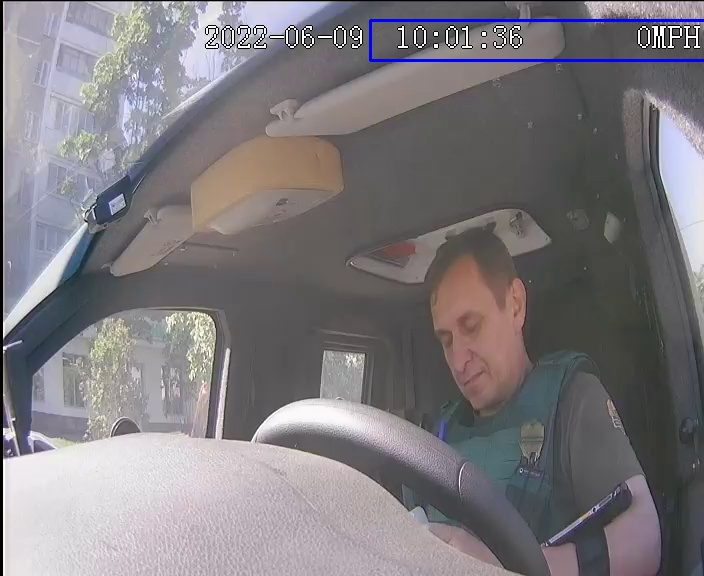

In [168]:
for img in image_path:
    image = cv2.imread(img)
    cv2.rectangle(image, (370, 20),(1030, 60), (255,0,0),2)
    cv2.rectangle(image, (1200, 20),(1280, 60), (0,255,0),2)
    
    # blur_rectangle(image, (200, 20),(530, 50)) # середина на квадратных видосах 
    # blur_rectangle(image, (630, 20),(720, 50)) # скорость правый верх на квадратных видосах 
    # blur_rectangle(frame, (1180, 25),(1280, 60)) # скорость правый верх
    # blur_rectangle(image, (420, 25),(750, 60)) # время верх середина
    # blur_rectangle(image, (30, 650),(450, 700)) # координаты слева снизу, только для внешних камер
    imshow(image)